In [1]:
import argparse

import os
import sys
import gzip
import time
import pandas as pd
from pandas import DataFrame

import numpy as np

import matplotlib.pyplot as plt

from os import listdir
from os.path import isfile, join

#from keras.utils.np_utils import to_categorical

from clusterLoad import filtersData, dataToPandas
from dataLabels import dataLab,tailLab,outPixLab,inPixLab
from dataLabels import clusterSize, headLab,XYZ,inXYZ,outXYZ, detnums

Using TensorFlow backend.


In [2]:
path="debug/"
fileL = 5

particles = []

In [3]:

def truesAndFakes(dataset):

    trues = dataset[dataset["pdgId"] != 0.0]
    # n_false = trues.shape[0]
    false = dataset[dataset["pdgId"] == 0.0]
    # false = false.sample(n=int(n_false))

    return (trues,false)




In [4]:
plotsdir = "plotsClusters/"
data = dataToPandas(path,fileL)

if not os.path.exists(plotsdir):
    os.makedirs(plotsdir)

Reading clusters from csv file no.1 :debug/doublets.h5
Reading clusters from csv file no.2 :debug/1_1_1_dataset.h5

 - Timing : 1.50228786469


In [13]:
print(float(True))
pdgIds = data[data['pdgId'] != 0.0].groupby('pdgId').count().index.values

1.0


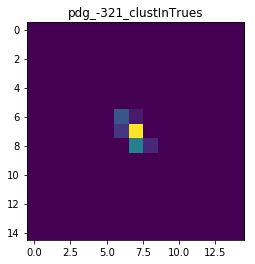

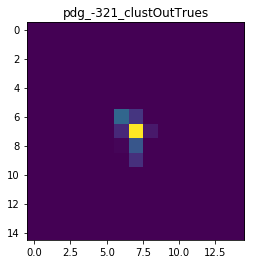

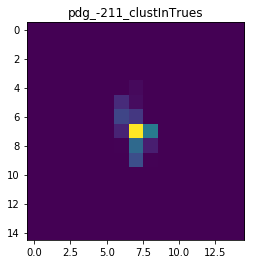

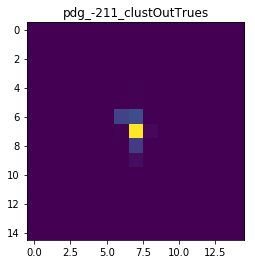

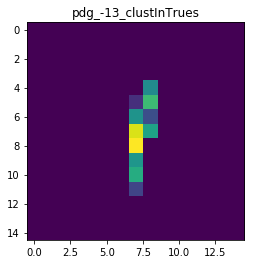

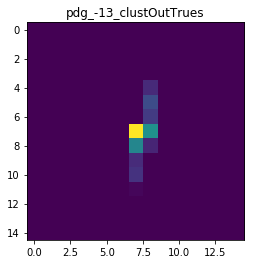

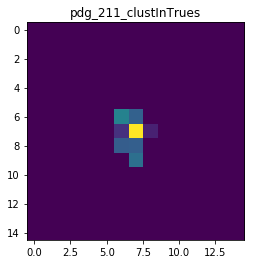

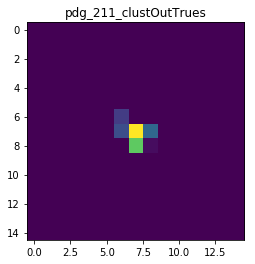

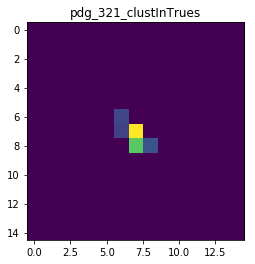

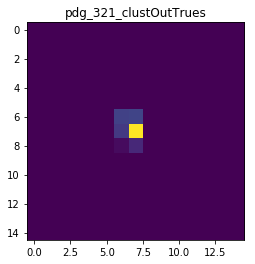

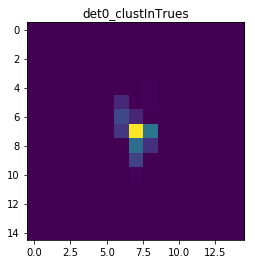

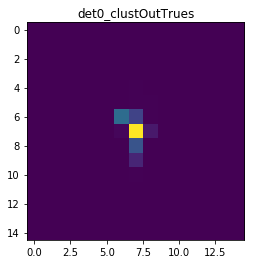

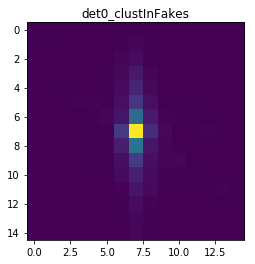

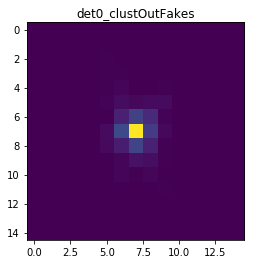

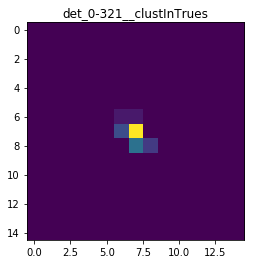

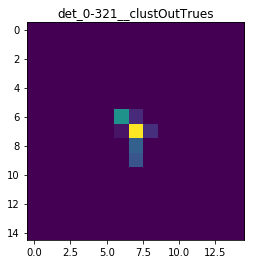

/lustre/home/adrianodif/Virtualenvs/keras_tf/lib/python2.7/site-packages/ipykernel_launcher.py:67: RuntimeWarning: Mean of empty slice.


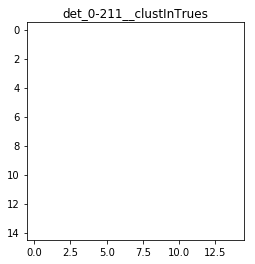

/lustre/home/adrianodif/Virtualenvs/keras_tf/lib/python2.7/site-packages/ipykernel_launcher.py:75: RuntimeWarning: Mean of empty slice.


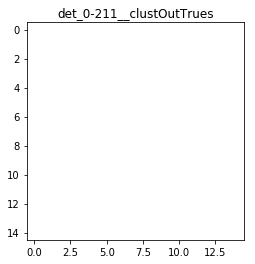

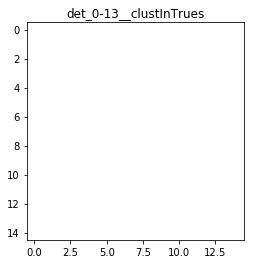

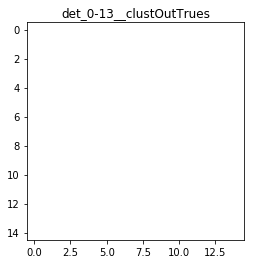

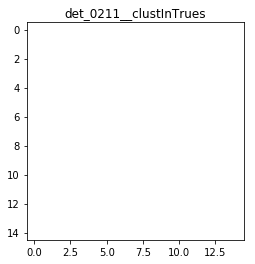

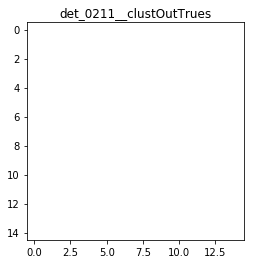

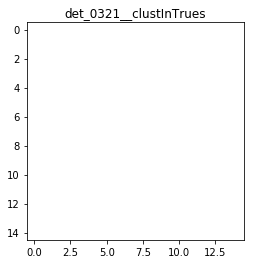

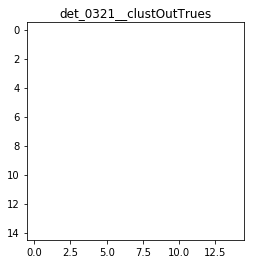

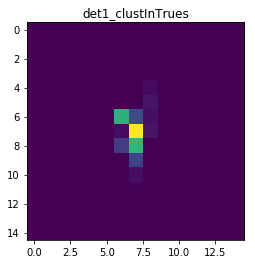

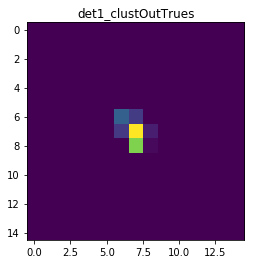

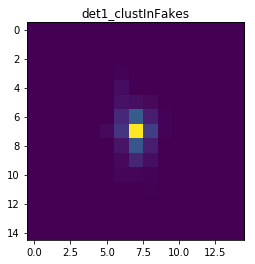

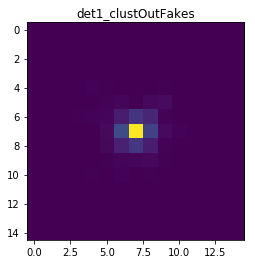

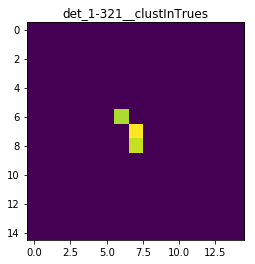

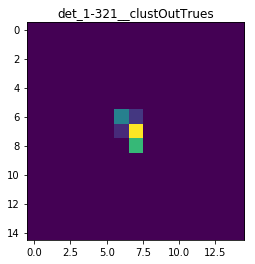

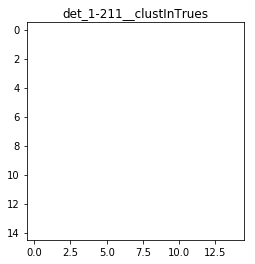

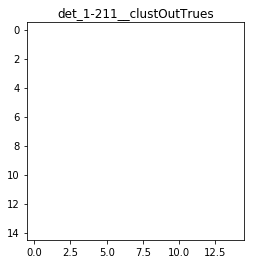

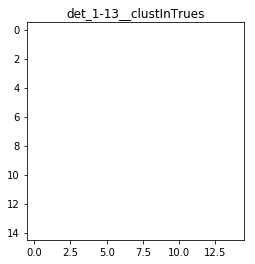

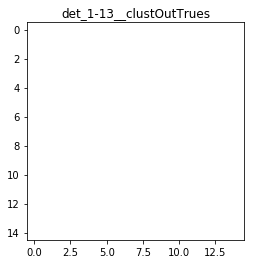

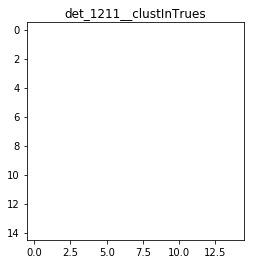

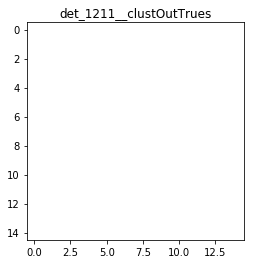

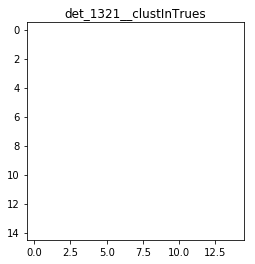

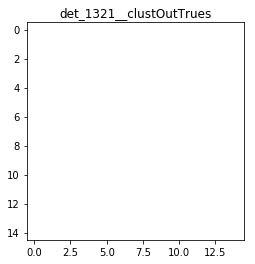

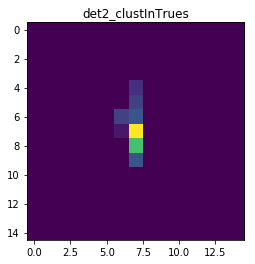

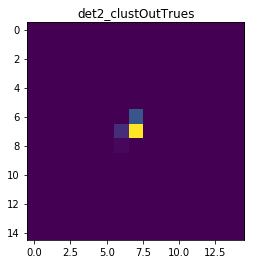

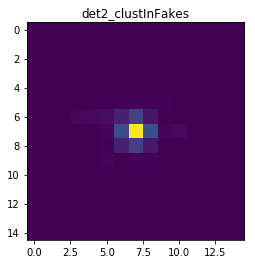

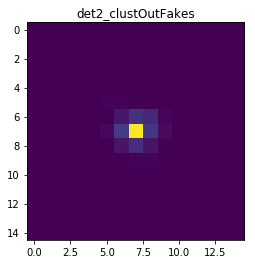

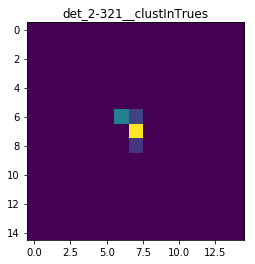

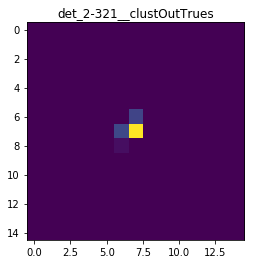

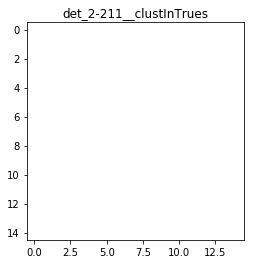

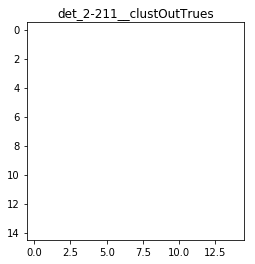

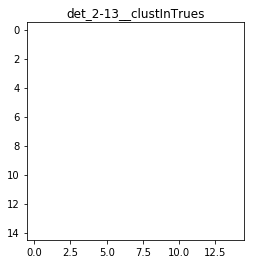

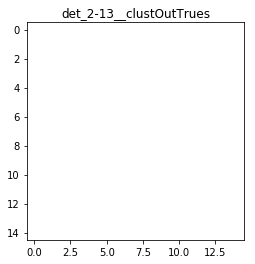

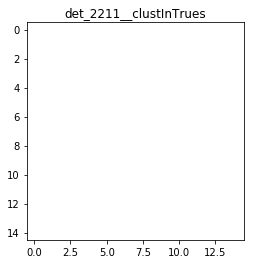

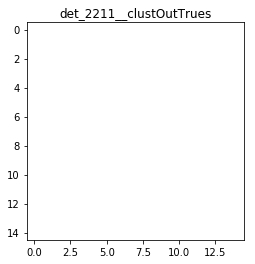

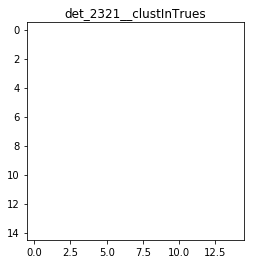

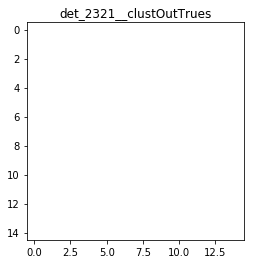

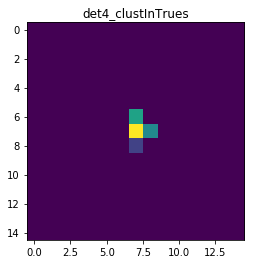

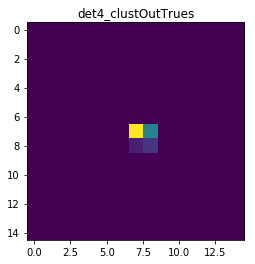

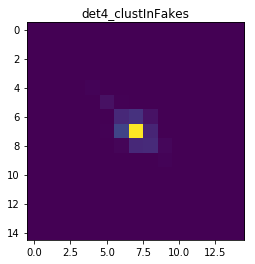

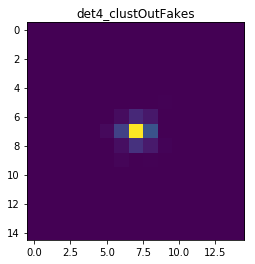

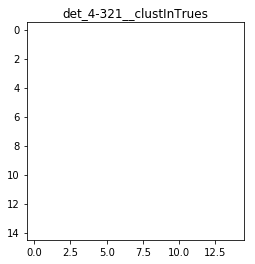

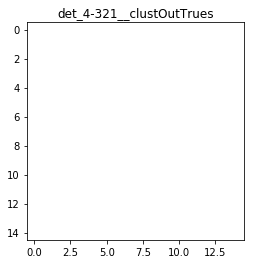

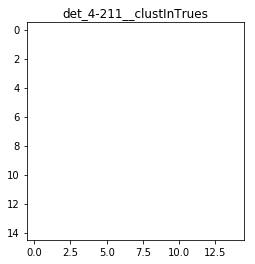

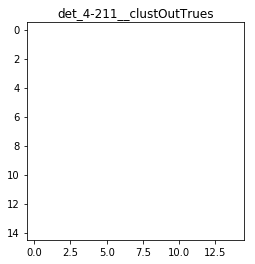

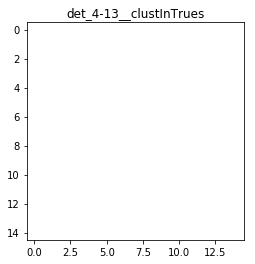

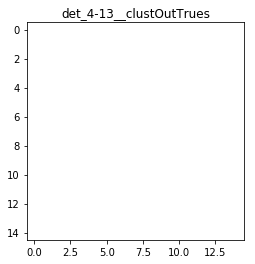

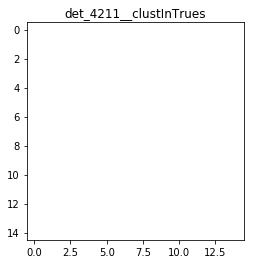

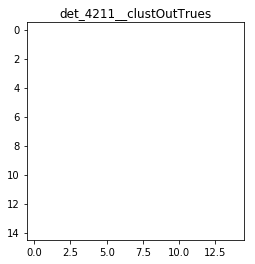

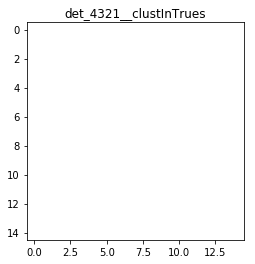

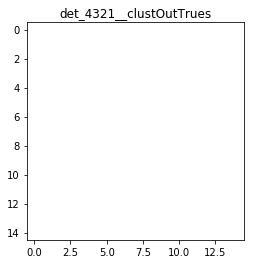

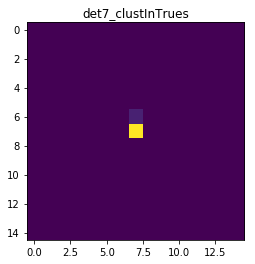

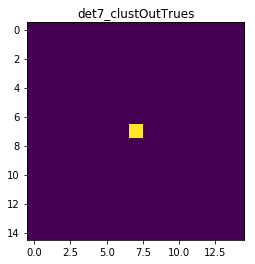

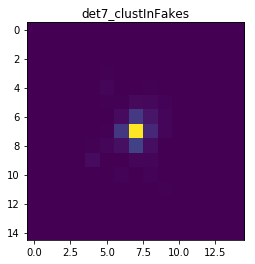

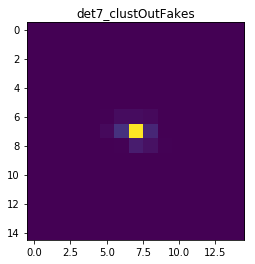

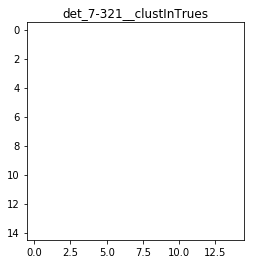

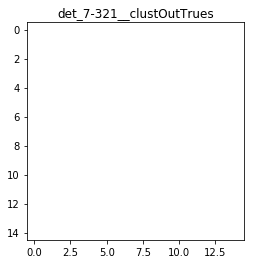

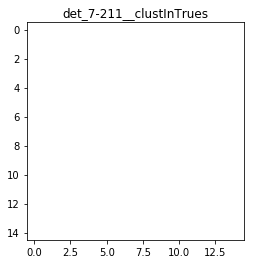

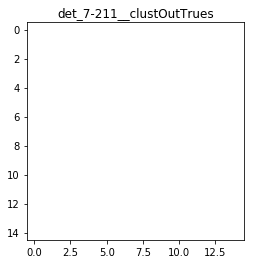

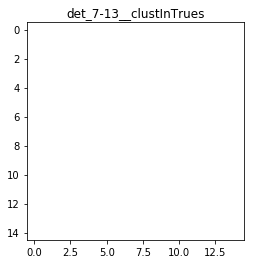

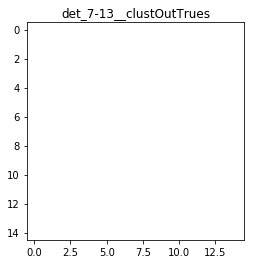

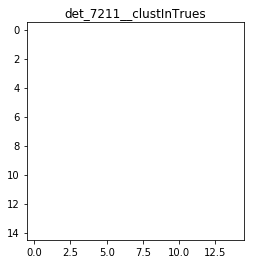

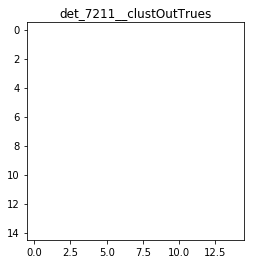

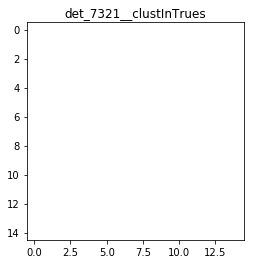

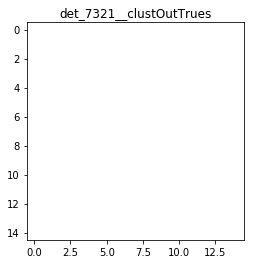

In [9]:
for pdgId in pdgIds:
    d = data[data["pdgId"]==pdgId]
    (t,f) = truesAndFakes(d)

    plt.title("pdg_" + str(pdgId) + "_clustInTrues") 
    plt.imshow(t[inPixLab].values.reshape(-1,clusterSize,clusterSize).mean(axis=0))
    plt.savefig(plotsdir + "pdg_" + str(pdgId) + "_clustInTrues.png")
    plt.show()
    plt.clf()
    plt.cla()
    plt.clf()
        
    plt.title("pdg_" + str(pdgId) + "_clustOutTrues") 
    plt.imshow(t[outPixLab].values.reshape(-1,clusterSize,clusterSize).mean(axis=0))
    plt.savefig(plotsdir + "pdg_" + str(pdgId) + "_clustOutTrues.png")
    plt.show()
    plt.clf()
    plt.cla()
    plt.clf()
        

for dd in detnums:
        d = data[data["detCounterIn"]==dd]
        (t,f) = truesAndFakes(d)

        if t.shape[0] == 0:
            continue
    
        plt.title("det" + str(int(dd)) + "_clustInTrues") 
        plt.imshow(t[inPixLab].values.reshape(-1,clusterSize,clusterSize).mean(axis=0))
        plt.savefig(plotsdir + "det_" + str(dd) + "_clustInTrues.png")
        plt.show()
        plt.clf()
        plt.cla()
        plt.clf()
        
        plt.title("det" + str(int(dd)) + "_clustOutTrues") 
        plt.imshow(t[outPixLab].values.reshape(-1,clusterSize,clusterSize).mean(axis=0))
        plt.savefig(plotsdir + "det_" + str(int(dd)) + "_clustOutTrues.png")
        plt.show()
        plt.clf()
        plt.cla()
        plt.clf()
        
        plt.title("det" + str(int(dd)) + "_clustInFakes") 
        plt.imshow(f[inPixLab].values.reshape(-1,clusterSize,clusterSize).mean(axis=0))
        plt.savefig(plotsdir + "det_" + str(int(dd)) + "_clustInFakes.png")
        plt.show()
        plt.clf()
        plt.cla()
        plt.clf()
        
        plt.title("det" + str(int(dd)) + "_clustOutFakes") 
        plt.imshow(f[outPixLab].values.reshape(-1,clusterSize,clusterSize).mean(axis=0))
        plt.savefig(plotsdir + "det_" + str(int(dd)) + "_clustOutFakes.png")
        plt.show()
        plt.clf()
        plt.cla()
        plt.clf()
        
        for pdgId in pdgIds:
            
            d = d[d["pdgId"]==pdgId]
            (t,_) = truesAndFakes(d)
        
            plt.title("det_" + str(int(dd)) + str(pdgId) + "_" + "_clustInTrues") 
            plt.imshow(t[inPixLab].values.reshape(-1,clusterSize,clusterSize).mean(axis=0))
            plt.savefig("det_" + str(int(dd)) + str(pdgId) + "_" + "_clustInTrues.png")
            plt.show()
            plt.clf()
            plt.cla()
            plt.clf()

            plt.title("det_" + str(int(dd)) + str(pdgId) + "_" + "_clustOutTrues") 
            plt.imshow(t[outPixLab].values.reshape(-1,clusterSize,clusterSize).mean(axis=0))
            plt.savefig(plotsdir + "det_" + str(int(dd)) + str(pdgId) + "_" + "_clustOutTrues.png")
            plt.show()
            plt.clf()
            plt.cla()
            plt.clf()
            
            


for dd in detnums:
        break
        d = filtersData(data,key="detCounterIn",val=dd)
        (t,f) = truesAndFakes(d)

        if t.shape[0] == 0:
            continue
            
        for i in inPixLab:
            # print(f[i].value_counts())
            # print(t[i].value_counts())
            #(f[i]).plot("hist")
            maxx = max(np.max(t[i].values),np.max(f[i].values))
            f[i].plot.hist(bins=100,range=(1.0,maxx+2.0),normed=True)
            t[i].plot.hist(bins=100,range=(1.0,maxx+2.0),normed=True, alpha = 0.5)
            plt.savefig(plotsdir + "det_" + str(int(dd)) + "_" + i + "plot.png")
            plt.cla()
            plt.clf()

        for i in outPixLab:
            # print(f[i].value_counts())
            # print(t[i].value_counts())
            #(f[i]).plot("hist")
            maxx = max(np.max(t[i].values),np.max(f[i].values))
            f[i].plot.hist(bins=100,range=(1.0,maxx+2.0),normed=True)
            t[i].plot.hist(bins=100,range=(1.0,maxx+2.0),normed=True, alpha = 0.5)
            plt.savefig(plotsdir + "det_" + str(int(dd)) + "_" + i + "plot.png")
            plt.cla()
            plt.clf()
        
        
            
            
            

In [8]:
!pwd

/lustre/home/adrianodif/Git/MLClustersDebug
